
Makes a 4-panel plot from my chosen best dates for histogram, or hist by area.

0.      For PAD and YF: choose inner ROI
1.    Choose best dates (in notebook) or multi-temporal hist
2.      Seed with CIR maks lakes (to help YF)
3.      Histograms of EM% binned by AREA

TODO: 
* Plots for all regions aggregated X
* Use GW fraction not EM fraction?
* "n=##" in titles X
* How to do error bars on log-log plots???


In [1]:
## imports
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from python_env import *
# from memory_profiler import profile

In [2]:
## User vars
min_size=250 # meters squared
regions=['Daring','Baker','PAD','YFLATS']

## constants
region_labels=dict(zip(
    [
    'daring_21405_17063_010_170614_L090_CX_01_LUT-Freeman_rcls_lakes.shp',
    'daring_21405_17094_010_170909_L090_CX_01_LUT-Freeman_rcls_lakes.shp',
    'bakerc_16008_18047_005_180821_L090_CX_02_Freeman-inc_rcls_lakes.shp',
    'bakerc_16008_19059_012_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp',
    'PAD_170613_mosaic_rcls_lakes.shp',
    'PAD_170908_mosaic_rcls_lakes.shp',
    'PAD_180821_mosaic_rcls_lakes.shp',
    'padelE_36000_19059_003_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp',
    'YFLATS_170621_mosaic_rcls_lakes.shp',
    'YFLATS_170916_mosaic_rcls_lakes.shp',
    'YFLATS_180827_mosaic_rcls_lakes.shp',
    'YFLATS_190914_mosaic_rcls_lakes.shp'
    ],

    [
    'CSD June 2017',
    'CSD Sept 2017',
    'CSB Aug 2018',
    'CSB Sept 2019',
    'PAD June 2017',
    'PAD September 2017',
    'PAD Aug 2018',
    'PAD Sept 2019',
    'YF June 2017',
    'YF Sept 2017',
    'YF Aug 2018',
    'YF Sept 2019'
    ]
))
best_dates=[
    'YFLATS_180827_mosaic_rcls_lakes.shp', 'padelE_36000_19059_003_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp', 'daring_21405_17094_010_170909_L090_CX_01_LUT-Freeman_rcls_lakes.shp', 'bakerc_16008_18047_005_180821_L090_CX_02_Freeman-inc_rcls_lakes.shp'
            ]
## load data
plt.style.use('/mnt/d/Dropbox/Python/Matplotlib-rcParams/presentation.mplstyle')

In [3]:
# dynamic I/O
## Save directory for dataframes as excel file
os.makedirs(os.path.join(output_raster_dir_common_roi, 'combined_excel'), exist_ok=True)
excel_pth_best_dates = os.path.join(output_raster_dir_common_roi, 'combined_excel', 'lake-based-stats-best-dates.xlsx')
excel_pth_all_12 = os.path.join(output_raster_dir_common_roi, 'combined_excel', 'lake-based-stats-all-12.xlsx')
excel_pth_all_12_summary = os.path.join(output_raster_dir_common_roi, 'combined_excel', 'lake-based-stats-all-12-summary.xlsx')

In [4]:
## loop over 4 best dates
lakes_list=[]
lakes_labels=[]
for i, basename in enumerate(best_dates):
    ## dynamic I/O
    filename = os.path.join(shape_dir, basename)
    label = region_labels[basename]
    print('label: '+label)

    ## print
    print(f'\n\n----------------\nInput: {filename}')
    print(f'\t(File {i+1} of {len(best_dates)})\n')

    ## I/O
    lakes = gpd.read_file(filename)
    
    ## compute EM coverage m2
    lakes['em_coverage_m2'] = lakes.area_px_m2 * lakes.em_fractio
    
    ## region
    lakes['region'] = label

    ## filter
    filter=(lakes.edge==False) & (lakes.area_px_m2>=min_size) & (lakes.cir_observ==True)
    
    ## save to mem
    lakes_list.append(lakes[filter])
    lakes_labels.append(label)

label: YF Aug 2018


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers/YFLATS_180827_mosaic_rcls_lakes.shp
	(File 1 of 4)

label: PAD Sept 2019


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers/padelE_36000_19059_003_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp
	(File 2 of 4)

label: CS-Daring Sept 2017


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers/daring_21405_17094_010_170909_L090_CX_01_LUT-Freeman_rcls_lakes.shp
	(File 3 of 4)

label: CS-Baker Aug 2018


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers/bakerc_16008_18047_005_180821_L090_CX_02_Freeman-inc_rcls_lakes.shp
	(File 4 of 4)



In [5]:
## loop over all 12 acquisitions (all available data)
lakes_list_all12=[]
lakes_labels_all12=[]
for i, basename in enumerate(region_labels.keys()):
    ## dynamic I/O
    filename = os.path.join(shape_dir, basename)
    label = region_labels[basename]
    print('label: '+label)

    ## print
    print(f'\n\n----------------\nInput: {filename}')
    print(f'\t(File {i+1} of {len(best_dates)})\n')

    ## I/O
    lakes = gpd.read_file(filename)

    ## filter
    filter=(lakes.edge==False) & (lakes.area_px_m2>=min_size) & (lakes.cir_observ==True)
    
    ## save to mem
    lakes_list_all12.append(lakes[filter])
    lakes_labels_all12.append(label)

label: Daring June 2017


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers/daring_21405_17063_010_170614_L090_CX_01_LUT-Freeman_rcls_lakes.shp
	(File 1 of 4)

label: Daring Sept 2017


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers/daring_21405_17094_010_170909_L090_CX_01_LUT-Freeman_rcls_lakes.shp
	(File 2 of 4)

label: Baker Aug 2018


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers/bakerc_16008_18047_005_180821_L090_CX_02_Freeman-inc_rcls_lakes.shp
	(File 3 of 4)

label: Baker Sept 2019


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers/bakerc_16008_19059_012_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp
	(File 4 of 4)

label: PAD June 2017


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_ri

In [5]:
## Create merged dataset
lakes_all=pd.concat(lakes_list)
lakes_all_all12=pd.concat(lakes_list_all12)
lakes_all.info()

NameError: name 'lakes_list_all12' is not defined

In [7]:
## set area bins
# lin
nbins=25
max_area_to_plot=lakes_all.area_px_m2.max()/1e6 # max is 34.00001 # original: 5 # km2
bins=np.linspace(0, max_area_to_plot, nbins)
# nMajorTicks=6

## log
bins_log=np.logspace(np.log10(min_size/1e6), np.log10(max_area_to_plot), nbins)
nMajorTicks=6

# ## log with bins based on powers of 10
# nbins=6
# max_area_to_plot=1e1 # km2
# bins_log=np.logspace(-4, np.log10(max_area_to_plot), nbins)
# nMajorTicks=6

# xlims - calc from first few plots, can update.
xlims = (0.00013844046679502208, 61.39825611751433)
bins_log

array([2.50000000e-04, 4.09107527e-04, 6.69475875e-04, 1.09555048e-03,
       1.79279179e-03, 2.93377846e-03, 4.80092340e-03, 7.85637561e-03,
       1.28564096e-02, 2.10386157e-02, 3.44282242e-02, 5.63393827e-02,
       9.21954621e-02, 1.50871430e-01, 2.46890551e-01, 4.04019131e-01,
       6.61149070e-01, 1.08192424e+00, 1.77049341e+00, 2.89728872e+00,
       4.74121049e+00, 7.75865960e+00, 1.26965042e+01, 2.07769417e+01,
       3.40000129e+01])

In [8]:
## Fig 1: EM hist plot
%matplotlib widget
fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation

for i, lakes in enumerate(lakes_list):
    
    ## prep
    axi = np.take(ax, i)
    h=axi.hist(lakes.em_fractio, alpha=0.4, color='b', label=label, bins=bins/max_area_to_plot)
    axi.set_ylabel('Lake count')
    axi.set_xlabel('Emergent macrophyte fraction')
    axi.set_title(f'{lakes_labels[i]}\nLakes > {min_size} m2 ({min_size/px_area:.0f} px)', fontsize=16)
    
## save fig 1
figname=os.path.join(fig_dir, 'Hists-subplots-min250-max34')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
## Fig 2: Hist plot by area (linear x scale)
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=False, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins)
    groups=lakes.groupby(area_bins)
#     h=groups.mean().em_fractio.plot.bar(ax=axi, width=1, color='c')
#     bar_locs = [groups.mean().em_fractio.index[j].mid for j in range(len(groups))]
    axi.bar(bins[:-1], groups.mean().em_fractio, color='c', align='edge', width=np.diff(bins)) # width=1,  width=0.2
    axi.set_xlabel('Area ($km^2$)')
    axi.set_ylabel('Mean emergent macrophyte fraction')
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticks(axi.get_xticks()[0:nbins+6:nbins//6])
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticklabels([f'{i:.1f}' for i in bins[0:nbins+6:nbins//6]], rotation = 0) # match default histogram formatting
#     axi.set_xscale('linear')
#     axi.set_xticks(np.arange(0,nMajorTicks,1)/nMajorTicks*25)
#     axi.set_xticklabels(np.arange(0,nMajorTicks,1), rotation = 0) # match default histogram formatting
    
## save fig 2: by area
figname=os.path.join(fig_dir, 'Hists-by-area-subplots-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
## Fig 2b: Hist plot by area (logx)
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     h=groups.mean().em_fractio.plot.bar(ax=axi, width=1, color='c')
#     bar_locs = [groups.mean().em_fractio.index[j].mid for j in range(len(groups))]
    axi.bar(bins_log[:-1], groups.mean().em_fractio, color='c', align='edge', width=np.diff(bins_log)) # width=1,  width=0.2
    axi.set_xlabel('Area ($km^2$)')
    axi.set_ylabel('Mean emergent macrophyte fraction')
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticks(axi.get_xticks()[0:nbins+6:nbins//6])
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticklabels([f'{i:.1f}' for i in bins[0:nbins+6:nbins//6]], rotation = 0) # match default histogram formatting
    axi.set_xscale('log')
#     axi.set_xticks(np.arange(0,nMajorTicks,1)/nMajorTicks*25)
#     axi.set_xticklabels(np.arange(0,nMajorTicks,1), rotation = 0) # match default histogram formatting
    
## save fig 2: by area
figname=os.path.join(fig_dir, 'Hists-by-area-subplots-logx-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save xlims for next plot to make it a tapper
xlims=axi.get_xlim()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
## Fig 2c: Hist plot by area (logx)
color_em_littoral = '#58D918'
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
    h=axi.bar(bins_log[:-1], groups.mean().em_fractio*100, color=color_em_littoral,\
              align='edge', width=np.diff(bins_log), label='EM fraction')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence
    axi.set_xlabel('Area ($km^2$)')
    axi.set_ylabel('Mean emergent macrophyte coverage (%)')
    
    ## y axis 2
    axiyy=axi.twinx()
    h1=axiyy.hist(lakes.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
    for j in range(len(axiyy.get_yticklabels())): # clunky way to set color
        axiyy.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
    axiyy.set_ylabel('Count')
    axiyy.yaxis.label.set_color((0.6, 0.6, 0.6))
    axi.set_title(f'{lakes_labels[i]} (n = {lakes.em_fractio.count()})', fontsize=16)
    axi.set_xscale('log')
    axi.set_xlim(xlims)

## legend on one plot only
# handles, labels = axi.get_legend_handles_labels()
# handlesyy, labelsyy = axiyy.get_legend_handles_labels() # doesn't work
import matplotlib.patches as mpatches
handlesyy = mpatches.Patch(color='black', label='Area histogram', alpha=0.1)
handles = mpatches.Patch(color=color_em_littoral, label='Area histogram') # 'c'
ax2[1,0].legend([handles, handlesyy], ['EM fraction', 'Area histogram'])
plt.legend

## Second plot
fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
area_bins=pd.cut(lakes_all.area_px_m2/1e6, bins_log)
groups=lakes_all.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
h=ax.bar(bins_log[:-1], groups.mean().em_fractio*100, color=color_em_littoral,\
          align='edge', width=np.diff(bins_log), label='EM fraction')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence # 'c'
ax.set_xlabel('Area ($km^2$)')
ax.set_ylabel('Mean emergent macrophyte coverage (%)')

## y axis 2
axiyyb=ax.twinx()
h1=axiyyb.hist(lakes_all.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
for j in range(len(axiyyb.get_yticklabels())): # clunky way to set color
    axiyyb.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
axiyyb.set_ylabel('Count')
axiyyb.yaxis.label.set_color((0.6, 0.6, 0.6))
ax.set_title(f'All (n={len(lakes_all)})', fontsize=16)
ax.set_xscale('log')
ax.set_xlim(xlims)

## save fig 2c: by area
figname=os.path.join(fig_dir, 'Hists-by-area-subplots-logx-with-area-hists-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save fig 2cb: by area
figname=os.path.join(fig_dir, 'Hists-by-area-all-logx-with-area-hists-min250-max34')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [54]:
## Fig 2d: Hist plot by area with summed bins(logx)
color_em_littoral = '#58D918'
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
    h=axi.bar(bins_log[:-1], groups.mean().em_fractio * groups.sum().area_px_m2/1e6, color=color_em_littoral,\
              align='edge', width=np.diff(bins_log), label='Emerg. Macr. Area')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence
    axi.set_xlabel('Lake area ($km^2$)')
    axi.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')
    
    ## y axis 2
    axiyy=axi.twinx()
    h1=axiyy.hist(lakes.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
    for j in range(len(axiyy.get_yticklabels())): # clunky way to set color
        axiyy.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
    axiyy.set_ylabel('Count')
    axiyy.yaxis.label.set_color((0.6, 0.6, 0.6))
    axi.set_title(f'{lakes_labels[i]} (n = {lakes.em_fractio.count()})', fontsize=16)
    axi.set_xscale('log')
    axi.set_xlim(xlims)

## legend on one plot only
# handles, labels = axi.get_legend_handles_labels()
# handlesyy, labelsyy = axiyy.get_legend_handles_labels() # doesn't work
import matplotlib.patches as mpatches
handlesyy = mpatches.Patch(color='black', label='Area histogram', alpha=0.1)
handles = mpatches.Patch(color=color_em_littoral, label='Area histogram') # 'c'
ax2[1,0].legend([handles, handlesyy], ['Emerg. Macr. Area', 'Area histogram'])
plt.legend

## Second plot
fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
area_bins=pd.cut(lakes_all.area_px_m2/1e6, bins_log)
groups=lakes_all.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
h=ax.bar(bins_log[:-1], groups.mean().em_fractio * groups.sum().area_px_m2/1e6, color=color_em_littoral,\
          align='edge', width=np.diff(bins_log), label='EM fraction')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence # 'c'
ax.set_xlabel('Lake area ($km^2$)')
ax.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')

## y axis 2
axiyyb=ax.twinx()
h1=axiyyb.hist(lakes_all.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
for j in range(len(axiyyb.get_yticklabels())): # clunky way to set color
    axiyyb.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
axiyyb.set_ylabel('Count')
axiyyb.yaxis.label.set_color((0.6, 0.6, 0.6))
ax.set_title(f'All (n={len(lakes_all)})', fontsize=16)
ax.set_xscale('log')
ax.set_xlim(xlims)

## save fig 2c: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-subplots-logx-with-area-hists-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save fig 2cb: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-all-logx-with-area-hists-min250-max34')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
## Fig 2e: Hist plot by area with summed bins and summed area hist bins (logx)
color_em_littoral = '#58D918'
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
    h=axi.bar(bins_log[:-1], groups.mean().em_fractio * groups.sum().area_px_m2/1e6, color=color_em_littoral,\
              align='edge', width=np.diff(bins_log), label='Emerg. Macr. Area')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence
    axi.set_xlabel('Lake area ($km^2$)')
    axi.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')
    
    ## y axis 2
    axiyy=axi.twinx()
    h1=axiyy.bar(bins_log[:-1], groups.sum().area_px_m2/1e6, alpha = 0.1, color='black',\
              align='edge', width=np.diff(bins_log), label='Total lake area/bin') 
    for j in range(len(axiyy.get_yticklabels())): # clunky way to set color
        axiyy.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
    axiyy.set_ylabel('Lake area ($km^2$)')
    axiyy.yaxis.label.set_color((0.6, 0.6, 0.6))
    axi.set_title(f'{lakes_labels[i]} (n = {lakes.em_fractio.count()})', fontsize=16)
    axi.set_xscale('log')
    axi.set_xlim(xlims)

## legend on one plot only
# handles, labels = axi.get_legend_handles_labels()
# handlesyy, labelsyy = axiyy.get_legend_handles_labels() # doesn't work
import matplotlib.patches as mpatches
handlesyy = mpatches.Patch(color='black', label='Total lake area/bin', alpha=0.1)
handles = mpatches.Patch(color=color_em_littoral, label='Area histogram') # 'c'
ax2[1,0].legend([handles, handlesyy], ['Emerg. Macr. Area', 'Total lake area/bin'])
plt.legend

## Second plot
fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
area_bins=pd.cut(lakes_all.area_px_m2/1e6, bins_log)
groups=lakes_all.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
h=ax.bar(bins_log[:-1], groups.mean().em_fractio * groups.sum().area_px_m2/1e6, color=color_em_littoral,\
          align='edge', width=np.diff(bins_log), label='EM fraction')
ax.set_xlabel('Lake area ($km^2$)')
ax.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')

## y axis 2
axiyyb=ax.twinx()
h1=axiyyb.bar(bins_log[:-1], groups.sum().area_px_m2/1e6, alpha = 0.1, color='black',\
              align='edge', width=np.diff(bins_log), label='Total lake area/bin') 
for j in range(len(axiyyb.get_yticklabels())): # clunky way to set color
    axiyyb.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
axiyyb.set_ylabel('Lake area ($km^2$)')
axiyyb.yaxis.label.set_color((0.6, 0.6, 0.6))
ax.set_title(f'All (n={len(lakes_all)})', fontsize=16)
ax.set_xscale('log')
ax.set_xlim(xlims)

## save fig 2c: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-subplots-logx-with-area-hists-sum-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save fig 2cb: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-all-logx-with-area-hists-sum-min250-max34')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
## Fig 2ev2: Hist plot by area with summed bins and summed area hist bins (logx)
## Compute by binning new field of em_coverage!
color_em_littoral = '#58D918'
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
    h=axi.bar(bins_log[:-1], groups.sum().em_coverage_m2/1e6, color=color_em_littoral,\
              align='edge', width=np.diff(bins_log), label='Emerg. Macr. Area')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence
    axi.set_xlabel('Lake area ($km^2$)')
    axi.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')
    
    ## y axis 2
    axiyy=axi.twinx()
    h1=axiyy.bar(bins_log[:-1], groups.sum().area_px_m2/1e6, alpha = 0.1, color='black',\
              align='edge', width=np.diff(bins_log), label='Total lake area/bin') 
    for j in range(len(axiyy.get_yticklabels())): # clunky way to set color
        axiyy.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
    axiyy.set_ylabel('Lake area ($km^2$)')
    axiyy.yaxis.label.set_color((0.6, 0.6, 0.6))
    axi.set_title(f'{lakes_labels[i]} (n = {lakes.em_fractio.count()})', fontsize=16)
    axi.set_xscale('log')
    axi.set_xlim(xlims)

## legend on one plot only
# handles, labels = axi.get_legend_handles_labels()
# handlesyy, labelsyy = axiyy.get_legend_handles_labels() # doesn't work
import matplotlib.patches as mpatches
handlesyy = mpatches.Patch(color='black', label='Total lake area/bin', alpha=0.1)
handles = mpatches.Patch(color=color_em_littoral, label='Area histogram') # 'c'
ax2[1,0].legend([handles, handlesyy], ['Emerg. Macr. Area', 'Total lake area/bin'])
plt.legend

## Second plot
fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
area_bins=pd.cut(lakes_all.area_px_m2/1e6, bins_log)
groups=lakes_all.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
h=ax.bar(bins_log[:-1], groups.mean().em_fractio * groups.sum().area_px_m2/1e6, color=color_em_littoral,\
          align='edge', width=np.diff(bins_log), label='EM fraction')
ax.set_xlabel('Lake area ($km^2$)')
ax.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')

## y axis 2
axiyyb=ax.twinx()
h1=axiyyb.bar(bins_log[:-1], groups.sum().area_px_m2/1e6, alpha = 0.1, color='black',\
              align='edge', width=np.diff(bins_log), label='Total lake area/bin') 
for j in range(len(axiyyb.get_yticklabels())): # clunky way to set color
    axiyyb.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
axiyyb.set_ylabel('Lake area ($km^2$)')
axiyyb.yaxis.label.set_color((0.6, 0.6, 0.6))
ax.set_title(f'All (n={len(lakes_all)})', fontsize=16)
ax.set_xscale('log')
ax.set_xlim(xlims)

## save fig 2c: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-subplots-logx-with-area-hists-sum-min250-max34-v2')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save fig 2cb: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-all-logx-with-area-hists-sum-min250-max34-v2')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
## Fig 2d: Cumulative Hist plot by area (logx)
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
    h=axi.bar(bins_log[:-1], np.cumsum(groups.mean().em_fractio*groups.sum().area_px_m2)/groups.sum().area_px_m2.sum(), color='c', 
              align='edge', width=np.diff(bins_log), label='EM fraction')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence # groups.mean().em_fractio.cumsum()/groups.mean().em_fractio.sum() <--- for CDF
    axi.set_xlabel('Cumulative area ($km^2$)')
    axi.set_ylabel('Cumulative mean EM fraction')
    
    ## y axis 2
    axiyy=axi.twinx()
    h1=axiyy.hist(lakes.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, cumulative=True, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
    for j in range(len(axiyy.get_yticklabels())): # clunky way to set color
        axiyy.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    axi.set_xscale('log')
    axi.set_xlim(xlims)

## legend on one plot only
# handles, labels = axi.get_legend_handles_labels()
# handlesyy, labelsyy = axiyy.get_legend_handles_labels() # doesn't work
import matplotlib.patches as mpatches
handlesyy = mpatches.Patch(color='black', alpha=0.1)
handles = mpatches.Patch(color='c')
ax2[1,0].legend([handles, handlesyy], ['EM fraction CDF', 'Area CDF'])
plt.legend

## Second plot
fig2db, ax2db = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
h=ax2db.bar(bins_log[:-1], np.cumsum(groups.mean().em_fractio*groups.sum().area_px_m2)/groups.sum().area_px_m2.sum(), color='c', 
          align='edge', width=np.diff(bins_log), label='EM fraction')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence # groups.mean().em_fractio.cumsum()/groups.mean().em_fractio.sum() <--- for CDF
ax2db.set_xlabel('Cumulative area ($km^2$)')
ax2db.set_ylabel('Cumulative mean EM fraction')

## Second plot, y axis 2
axiyyb=ax2db.twinx()
h1=axiyyb.hist(lakes_all.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, cumulative=True, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
for j in range(len(axiyyb.get_yticklabels())): # clunky way to set color
    axiyyb.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
ax2db.set_title(f'All (n={len(lakes_all)})', fontsize=16)
ax2db.set_xscale('log')
ax2db.set_xlim(xlims)

## save fig 2d: by area
figname=os.path.join(fig_dir, 'Cum-hists-by-area-subplots-logx-with-area-hists-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save fig 2db: by area
figname=os.path.join(fig_dir, 'Cum-hists-by-area-all-logx-with-area-hists-min250-max34')
fig2db.savefig(figname + '.jpg', dpi=300)
fig2db.savefig(figname + '.pdf', dpi=300)

## save xlims for next plot to make it a tapper
xlims=axi.get_xlim()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [26]:
area_bins
lakes_all.area_px_m2.max()/1e6

34.00001294923602

In [27]:
groups.em_fractio.describe()
# groups.em_fractio.quantile(0.25)
# groups.std().em_fractio
# dir(groups)
groups.mean().area_px_m2

area_px_m2
(0.00025, 0.000409]     3.030363e+02
(0.000409, 0.000669]    5.461224e+02
(0.000669, 0.0011]      8.758490e+02
(0.0011, 0.00179]       1.522573e+03
(0.00179, 0.00293]      2.519914e+03
(0.00293, 0.0048]       3.840028e+03
(0.0048, 0.00786]       6.528447e+03
(0.00786, 0.0129]       1.044316e+04
(0.0129, 0.021]         1.623277e+04
(0.021, 0.0344]         2.736258e+04
(0.0344, 0.0563]        4.412333e+04
(0.0563, 0.0922]        7.168389e+04
(0.0922, 0.151]         1.163864e+05
(0.151, 0.247]          1.957230e+05
(0.247, 0.404]          3.239902e+05
(0.404, 0.661]          4.891746e+05
(0.661, 1.082]          9.419719e+05
(1.082, 1.77]           1.284811e+06
(1.77, 2.897]           1.916964e+06
(2.897, 4.741]          3.873076e+06
(4.741, 7.759]          6.028982e+06
(7.759, 12.697]                  NaN
(12.697, 20.777]                 NaN
(20.777, 34.0]          3.400001e+07
Name: area_px_m2, dtype: float64

In [28]:
## Fig 3: Area hist plots
%matplotlib widget
fig3, ax3 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax3, i)
    axi.hist(lakes.area_px_m2/1e6, alpha=0.4, color='g', label=label, bins=bins_log, )
    axi.set_xlabel('Area ($km^2$)')
    axi.set_ylabel('Count')
    axi.set_yscale('linear')
    axi.set_xscale('log')
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    axi.set_xlim(0, max_area_to_plot)

## save fig 3: by area
figname=os.path.join(fig_dir, 'Area-hists-subplots-min250')
fig3.savefig(figname + '.jpg', dpi=300)
fig3.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/ekyzivat/miniconda2/envs/geohackw/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


In [53]:
## Calc various averages for each lake dataframe
for i, lakes in enumerate(lakes_list):
#     print(lakes.em_fractio.mean())
#     indiv_med_df=lakes.median()
    indiv_mean_df=lakes.mean()
    indiv_mean_df['em_weight_avg'] = np.average(lakes.em_fractio, weights=lakes.area_px_m2) # for weighted Average by area within site
    indiv_mean_df['Count'] = len(lakes) # for weighted average by lake across sites
    indiv_mean_df['em_median'] = lakes.median().em_fractio
    if i==0: # first time
        lakes_mean_df=indiv_mean_df
#         lakes_med_df=indiv_med_df
    else:
        lakes_mean_df=pd.concat((lakes_mean_df, indiv_mean_df), axis=1)
#         lakes_med_df=pd.concat((lakes_med_df, indiv_med_df), axis=1)
# lakes.mean()
lakes_mean_df.columns=lakes_labels
lakes_mean_df=lakes_mean_df.T
# display(lakes_med_df)

## append summary rows
## count-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df, weights=lakes_mean_df.Count, axis=0), columns=['cnt_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df.columns
lakes_mean_df_append = lakes_mean_df.append(lakes_mean_df_mean_tmp)

## mean-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df, weights=lakes_mean_df.area_px_m2, axis=0), columns=['mn_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df.columns
lakes_mean_df_append = lakes_mean_df_append.append(lakes_mean_df_mean_tmp)

## non-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.mean(lakes_mean_df, axis=0), columns=['unwghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df.columns
lakes_mean_df_append = lakes_mean_df_append.append(lakes_mean_df_mean_tmp)

## total-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df, weights=lakes_mean_df.area_px_m2*lakes_mean_df.Count, axis=0), columns=['tot_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df.columns
lakes_mean_df_append = lakes_mean_df_append.append(lakes_mean_df_mean_tmp)

display(lakes_mean_df_append)

## save as excel
lakes_mean_df_append.to_excel(excel_pth_best_dates)
print(f'Saved as excel: {excel_pth_best_dates}')

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,Count,em_median
YFLATS Aug 2018,21198.272457,68156.472760,1351.902118,0.247892,0.002410,0.049813,0.195669,0.0,1.0,0.209293,1681.000000,0.129360
PAD Sept 2019,10906.263529,157057.916159,3334.274106,0.494236,0.000218,0.252030,0.241988,0.0,1.0,0.577297,425.000000,0.485564
Daring Sept 2017,16384.269465,156864.867191,1460.796590,0.017356,0.000000,0.000216,0.017141,0.0,1.0,0.005611,1644.000000,0.000000
Baker Aug 2018,7521.655914,249912.895303,2617.704954,0.209097,0.000346,0.036909,0.171842,0.0,1.0,0.069305,372.000000,0.145355
cnt_wghtd_mean,16982.836730,129105.794224,1713.961618,0.177845,0.001036,0.049717,0.127091,0.0,1.0,0.153367,1418.608928,0.115937
mn_lk_ar_wghtd_mean,12037.474747,184140.792484,2372.119506,0.236550,0.000451,0.082654,0.153446,0.0,1.0,0.194835,842.058058,0.192098
unwghtd_mean,14002.615341,157998.037853,2191.169442,0.242145,0.000743,0.084742,0.156660,0.0,1.0,0.215376,1030.500000,0.190070
tot_lk_ar_wghtd_mean,15185.328359,154046.100363,1874.444580,0.160298,0.000607,0.048888,0.110803,0.0,1.0,0.132294,1276.858042,0.114146


Saved as excel: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/landcover_raster_burned_subroi/combined_excel/lake-based-stats-best-dates.xlsx


In [162]:
## Calc various averages for each lake dataframe in all 12
for i, lakes in enumerate(lakes_list_all12):
#     print(lakes.em_fractio.mean())
#     indiv_med_df=lakes.median()
    indiv_mean_df=lakes.mean()
    indiv_mean_df['em_weight_avg'] = np.average(lakes.em_fractio, weights=lakes.area_px_m2) # for weighted Average by area within site
    indiv_mean_df['Count'] = len(lakes) # for weighted average by lake across sites
    indiv_mean_df['em_median'] = lakes.median().em_fractio
    if i==0: # first time
        lakes_mean_df_all12=indiv_mean_df
#         lakes_med_df=indiv_med_df
    else:
        lakes_mean_df_all12=pd.concat((lakes_mean_df_all12, indiv_mean_df), axis=1)
#         lakes_med_df=pd.concat((lakes_med_df, indiv_med_df), axis=1)
# lakes.mean()
lakes_mean_df_all12.columns=lakes_labels_all12
lakes_mean_df_all12=lakes_mean_df_all12.T

## append summary rows
## count-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12, weights=lakes_mean_df_all12.Count, axis=0), columns=['cnt_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12.columns
lakes_mean_df_all12_append = lakes_mean_df_all12.append(lakes_mean_df_mean_tmp)

## mean-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12, weights=lakes_mean_df_all12.area_px_m2, axis=0), columns=['mn_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12.columns
lakes_mean_df_all12_append = lakes_mean_df_all12_append.append(lakes_mean_df_mean_tmp)

## non-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.mean(lakes_mean_df_all12, axis=0), columns=['unwghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12.columns
lakes_mean_df_all12_append = lakes_mean_df_all12_append.append(lakes_mean_df_mean_tmp)

## total-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12, weights=lakes_mean_df_all12.area_px_m2*lakes_mean_df_all12.Count, axis=0), columns=['tot_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12.columns
lakes_mean_df_all12_append = lakes_mean_df_all12_append.append(lakes_mean_df_mean_tmp)

display(lakes_mean_df_all12_append)

## save as excel
lakes_mean_df_all12_append.to_excel(excel_pth_all_12)
print(f'Saved as excel: {excel_pth_all_12}')

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,Count,em_median
Daring June 2017,14759.476025,155515.744790,1422.498656,0.011959,0.000000,0.000432,0.011527,0.0,1.0,0.007238,1731.000000,0.000000
Daring Sept 2017,16384.269465,156864.867191,1460.796590,0.017356,0.000000,0.000216,0.017141,0.0,1.0,0.005611,1644.000000,0.000000
Baker Aug 2018,7521.655914,249912.895303,2617.704954,0.209097,0.000346,0.036909,0.171842,0.0,1.0,0.069305,372.000000,0.145355
Baker Sept 2019,2930.019022,253910.689496,2360.216981,0.139893,0.000348,0.014098,0.125447,0.0,1.0,0.043478,368.000000,0.086002
PAD June 2017,14411.946746,284399.129545,5433.574113,0.524331,0.000760,0.218072,0.305499,0.0,1.0,0.644256,338.000000,0.574657
PAD September 2017,20889.082443,127134.423145,2828.015748,0.467353,0.000170,0.109669,0.357514,0.0,1.0,0.509401,655.000000,0.428571
PAD Aug 2018,14859.285311,223576.288726,5107.969995,0.574923,0.001247,0.298990,0.274686,0.0,1.0,0.599685,354.000000,0.616313
PAD Sept 2019,10906.263529,157057.916159,3334.274106,0.494236,0.000218,0.252030,0.241988,0.0,1.0,0.577297,425.000000,0.485564
YFLATS June 2017,57191.777990,89928.661533,1769.632300,0.329511,0.002598,0.059684,0.267229,0.0,1.0,0.232848,2617.000000,0.266065
YFLATS Sept 2017,72554.156172,88811.451076,1577.404758,0.295623,0.003243,0.072598,0.219782,0.0,1.0,0.210813,2811.000000,0.216251


Saved as excel: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/landcover_raster_burned_subroi/combined_excel/lake-based-stats-all-12.xlsx


In [234]:
## View full df
lakes_mean_df_append

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,Count,em_median
YFLATS Aug 2018,21198.272457,68156.472760,1351.902118,0.247892,0.002410,0.049813,0.195669,0.0,1.0,0.209293,1681.000000,0.129360
PAD Sept 2019,10906.263529,157057.916159,3334.274106,0.494236,0.000218,0.252030,0.241988,0.0,1.0,0.577297,425.000000,0.485564
Daring Sept 2017,16384.269465,156864.867191,1460.796590,0.017356,0.000000,0.000216,0.017141,0.0,1.0,0.005611,1644.000000,0.000000
Baker Aug 2018,7521.655914,249912.895303,2617.704954,0.209097,0.000346,0.036909,0.171842,0.0,1.0,0.069305,372.000000,0.145355
cnt_wghtd_mean,16982.836730,129105.794224,1713.961618,0.177845,0.001036,0.049717,0.127091,0.0,1.0,0.153367,1418.608928,0.115937
mn_lk_ar_wghtd_mean,12037.474747,184140.792484,2372.119506,0.236550,0.000451,0.082654,0.153446,0.0,1.0,0.194835,842.058058,0.192098
unwghtd_mean,14002.615341,157998.037853,2191.169442,0.242145,0.000743,0.084742,0.156660,0.0,1.0,0.215376,1030.500000,0.190070
tot_lk_ar_wghtd_mean,15185.328359,154046.100363,1874.444580,0.160298,0.000607,0.048888,0.110803,0.0,1.0,0.132294,1276.858042,0.114146


In [235]:
## View Data table (format for paper with relevant columns)
# NOte that total lake area-weighted mean is lowest val, followed by count-weighted mean
lakes_mean_df_append[['em_weight_avg', 'em_fractio', 'em_median']]

,em_weight_avg,em_fractio,em_median
YFLATS Aug 2018,0.209293,0.247892,0.129360
PAD Sept 2019,0.577297,0.494236,0.485564
Daring Sept 2017,0.005611,0.017356,0.000000
Baker Aug 2018,0.069305,0.209097,0.145355
cnt_wghtd_mean,0.153367,0.177845,0.115937
mn_lk_ar_wghtd_mean,0.194835,0.236550,0.192098
unwghtd_mean,0.215376,0.242145,0.190070
tot_lk_ar_wghtd_mean,0.132294,0.160298,0.114146


In [236]:
## View full Data table for best dates
lakes_mean_df_append[['em_weight_avg', 'em_fractio', 'perimeter_','area_px_m2']]

,em_weight_avg,em_fractio,perimeter_,area_px_m2
YFLATS Aug 2018,0.209293,0.247892,1351.902118,68156.472760
PAD Sept 2019,0.577297,0.494236,3334.274106,157057.916159
Daring Sept 2017,0.005611,0.017356,1460.796590,156864.867191
Baker Aug 2018,0.069305,0.209097,2617.704954,249912.895303
cnt_wghtd_mean,0.153367,0.177845,1713.961618,129105.794224
mn_lk_ar_wghtd_mean,0.194835,0.236550,2372.119506,184140.792484
unwghtd_mean,0.215376,0.242145,2191.169442,157998.037853
tot_lk_ar_wghtd_mean,0.132294,0.160298,1874.444580,154046.100363


In [244]:
## Calculate averages for the four sites
def firstElement(x):
    return x.split(' ')[0]
lakes_mean_df_all12['tmp'] = lakes_mean_df_all12.index.copy()
lakes_mean_df_all12['Region'] = lakes_mean_df_all12['tmp'].apply(firstElement)
lakes_mean_df_all12_summary = lakes_mean_df_all12.groupby('Region').mean()
# display(lakes_mean_df_all12_summary)

## append summary rows
## count-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12_summary, weights=lakes_mean_df_all12_summary.Count, axis=0), columns=['cnt_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12_summary.columns
lakes_mean_df_all12_summary_append = lakes_mean_df_all12_summary.append(lakes_mean_df_mean_tmp)

## mean-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12_summary, weights=lakes_mean_df_all12_summary.area_px_m2, axis=0), columns=['mn_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12_summary.columns
lakes_mean_df_all12_summary_append = lakes_mean_df_all12_summary_append.append(lakes_mean_df_mean_tmp)

## non-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.mean(lakes_mean_df_all12_summary, axis=0), columns=['unwghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12_summary.columns
lakes_mean_df_all12_summary_append = lakes_mean_df_all12_summary_append.append(lakes_mean_df_mean_tmp)

## total-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12_summary, weights=lakes_mean_df_all12_summary.area_px_m2*lakes_mean_df_all12_summary.Count, axis=0), columns=['tot_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12_summary.columns
lakes_mean_df_all12_summary_append = lakes_mean_df_all12_summary_append.append(lakes_mean_df_mean_tmp)

display(lakes_mean_df_all12_summary_append)

## save as excel
lakes_mean_df_all12_summary_append.to_excel(excel_pth_all_12_summary)
print(f'Saved as excel: {excel_pth_all_12_summary}')

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,Count,em_median
Baker,5225.837468,251911.792400,2488.960968,0.174495,0.000347,0.025504,0.148644,0.0,1.0,0.056391,370.000000,0.115679
Daring,15571.872745,156190.305990,1441.647623,0.014658,0.000000,0.000324,0.014334,0.0,1.0,0.006424,1687.500000,0.000000
PAD,15266.644507,198041.939394,4175.958491,0.515211,0.000599,0.219690,0.294922,0.0,1.0,0.582660,443.000000,0.526276
YFLATS,43156.208032,83227.105698,1554.587101,0.272142,0.002797,0.053930,0.215415,0.0,1.0,0.206412,2145.750000,0.179696
cnt_wghtd_mean,27457.982679,134107.214581,1837.912468,0.194024,0.001376,0.048001,0.144647,0.0,1.0,0.157704,1675.555192,0.142378
mn_lk_ar_wghtd_mean,15033.741873,194383.424639,2623.505092,0.247950,0.000636,0.079016,0.168297,0.0,1.0,0.214368,903.860934,0.215154
unwghtd_mean,19805.140688,172342.785870,2415.288546,0.244126,0.000936,0.074862,0.168329,0.0,1.0,0.212972,1161.562500,0.205413
tot_lk_ar_wghtd_mean,21887.165325,155489.928634,2015.676200,0.182843,0.000938,0.050341,0.131564,0.0,1.0,0.152352,1446.529739,0.142907


Saved as excel: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/landcover_raster_burned_subroi/combined_excel/lake-based-stats-all-12-summary.xlsx


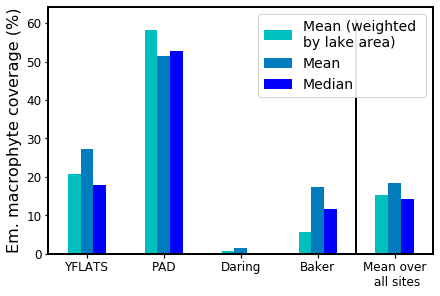

In [251]:
## Plot 4: Mean EM comparison with summary data
%matplotlib inline

# ## colors
# from cycler import cycler
# color_cycle = cycler(c=['r', 'g', 'b'])

fig4, ax4 = plt.subplots(constrained_layout=True) # constrained_layout is now default for presentation
# bar_heights=np.vstack((lakes_mean_df.em_weight_avg, lakes_mean_df.em_fractio))
# ax4.bar(np.arange(4), bar_heights, alpha=0.4, color='g')

lakes_mean_df_all12_summary_append.iloc[[3,2,1,0,7], ][['em_weight_avg', 'em_fractio', 'em_median']].plot.bar(ax=ax4, color = ['c', '#017CBF', 'b'])
# ax4.set_xlabel('Area ($km^2$)')
# ax4.set_ytick_labels([1,2])
# plt.setp(ax4.get_yticklabels(),labels=[1])
plt.gca().set_yticklabels([0,10,20,30,40,50,60]) # Sloopy fix!
ax4.set_xticks(np.arange(5))
labels=[label.split(' ')[0] for label in lakes_labels]
labels.append('Mean over\n all sites')
ax4.set_xticklabels(labels, rotation=0)
ax4.set_ylabel('Em. macrophyte coverage (%)')

## legend
ax4.legend(['Mean (weighted \nby lake area)','Mean','Median'])

## set ylim
ylims=ax4.get_ylim()
# ax4.set_ylim(ylims)

## add separator line
ax4.vlines(3.5, 0, ylims[1], linewidth = [plt.rcParams['axes.linewidth']])

## Save
figname=os.path.join(fig_dir, 'EM-mean-by-region-summary-min250-max34')
fig4.savefig(figname + '.jpg', dpi=300)
fig4.savefig(figname + '.pdf', dpi=300)

### Sanity check
Here, I calculate mean and median of merged dataframe with lakes from all four sites

In [146]:
print('Based on merged dataframe:\n')
print(f'Mean weighted by lake area (total): {np.average(lakes_all.em_fractio, weights=lakes_all.area_px_m2):0.3}')
print(f'Mean (total): {np.mean(lakes_all.em_fractio):0.3}')
print(f'\nSuper median (total): {np.median(lakes_all.em_fractio):0.3}')
print(f'10th percentile (total): {np.quantile(lakes_all.em_fractio, 0.1):0.3}')
print(f'90th percentile (total): {np.quantile(lakes_all.em_fractio, 0.9):0.3}')

Based on merged dataframe:

Mean weighted by lake area (total): 0.132
Mean (total): 0.178

Super median (total): 0.0105
10th percentile (total): 0.0
90th percentile (total): 0.651


### More investigation On the distribution


Mean +/- stdev (%): 
[-9.42262525 44.99153664]

Quantiles (%): 
[ 0.5        65.63525792]

Mean +/- stdev on log transformed and undone (%): 
[ 0.45335485 26.6452279 ]


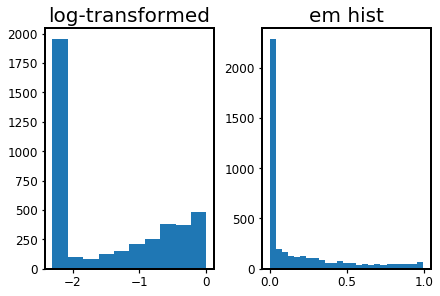

In [253]:
## More investigation On the distribution - from four cherry picked lakes
%matplotlib inline
# lakes_all.em_fractio.plot.hist()
em_transf = np.log10(lakes_all.em_fractio+0.005)
fig, ax = plt.subplots(1, 2)
ax[0].hist(em_transf); ax[0].set_title('log-transformed')
ax[1].hist(lakes_all.em_fractio, bins = 25); ax[1].set_title('em hist')

## mean +/- std
stddev = np.std(lakes_all.em_fractio)
print('\nMean +/- stdev (%): ')
print(100*np.array([lakes_all.em_fractio.mean()-stddev, lakes_all.em_fractio.mean()+stddev]))

## Verify that quantile's of log transformed data set are the same
print('\nQuantiles (%): ')
print(100*10**(np.quantile(em_transf, (0.1, 0.9))))

# Calculate standard deviation on log transformed data
stddev_log = np.std(em_transf)
print('\nMean +/- stdev on log transformed and undone (%): ')
print(100*10**np.array([em_transf.mean()-stddev_log, em_transf.mean()+stddev_log]))


Mean +/- stdev (%): 
[-2.99730883 44.99153664]

Quantiles (%): 
[ 0.5        74.57407407]

Mean +/- stdev on log transformed and undone (%): 
[ 0.88265254 48.71401669]


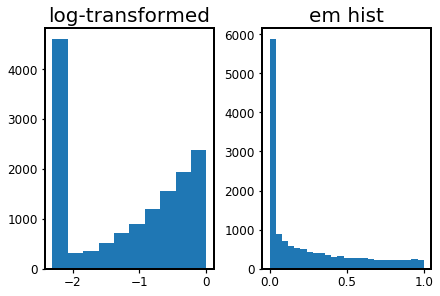

In [252]:
## More investigation On the distribution - average all 12, which is sketchy
%matplotlib inline
# lakes_all.em_fractio.plot.hist()
em_transf = np.log10(lakes_all_all12.em_fractio+0.005)
fig, ax = plt.subplots(1, 2)
ax[0].hist(em_transf); ax[0].set_title('log-transformed')
ax[1].hist(lakes_all_all12.em_fractio, bins = 25); ax[1].set_title('em hist')

## mean +/- std
stddev = np.std(lakes_all.em_fractio)
print('\nMean +/- stdev (%): ')
print(100*np.array([lakes_all_all12.em_fractio.mean()-stddev, lakes_all.em_fractio.mean()+stddev]))

## Verify that quantile's of log transformed data set are the same
print('\nQuantiles (%): ')
print(100*10**(np.quantile(em_transf, (0.1, 0.9))))

# Calculate standard deviation on log transformed data
stddev_log = np.std(em_transf)
print('\nMean +/- stdev on log transformed and undone (%): ')
print(100*10**np.array([em_transf.mean()-stddev_log, em_transf.mean()+stddev_log]))

In [46]:
## Fig 5: A vs EM scatter plots!

%matplotlib widget
fig5, ax5 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
color='#fec89a'
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax5, i)
    axi.scatter(lakes.area_px_m2/1e6, lakes.em_fractio*100, alpha=0.4, color=color)
    axi.set_xlabel('Lake area ($km^2$)')
    axi.set_ylabel('Emergent macrophyte coverage (%)')
    axi.set_yscale('log')
    axi.set_xscale('log')
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    axi.set_xlim(1e-4, 4e1) # , max_area_to_plot

## Second plot
f=32 # font size for ASLO presentation
fig5b, ax5b = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
ax5b.scatter(lakes_all.area_px_m2/1e6, lakes_all.em_fractio*100, alpha=0.2, color=color)
ax5b.set_xlabel('Lake area ($km^2$)', fontsize=f)
ax5b.set_ylabel('Em. macrophytes (%)', fontsize=f)
ax5b.set_yscale('log')
ax5b.set_xscale('log')
ax5b.set_xlim(1e-4, 4e1) # , max_area_to_plot
# plt.setp(ax5b.get_xticklabels(), fontsize=f) # works
ax5b.tick_params(labelsize=f-4)
# ax5b.

## save fig 5
figname=os.path.join(fig_dir, 'Area-EM-scatter-subplots-min250-max34')
fig5.savefig(figname + '.jpg', dpi=300)
fig5.savefig(figname + '.pdf', dpi=300)

## save fig 5b
figname=os.path.join(fig_dir, 'Area-EM-scatter-all-min250-max34')
fig5b.savefig(figname + '.jpg', dpi=300)
fig5b.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [271]:
## correlation for this figure
from scipy.stats import pearsonr, spearmanr, linregress # spearman doesn't assume linearity
print('Numpy correlation is {:0.2}'.format(np.corrcoef(lakes_all.area_px_m2, lakes_all.em_fractio)[0,1]**2))
rp, pp = pearsonr(lakes_all.area_px_m2, lakes_all.em_fractio)
print('Pearson correlation is {:0.2} (p = {:0.3})'.format(rp**2, pp))
rs, ps = spearmanr(lakes_all.area_px_m2, lakes_all.em_fractio)
print('Spearman correlation is {:0.2} (p = {:0.3})'.format(rs**2, ps))
linregress(lakes_all.area_px_m2, lakes_all.em_fractio) #ls, li, lr, lp = 

Numpy correlation is 0.00053
Pearson correlation is 0.00053 (p = 0.141)
Spearman correlation is 0.11 (p = 2.63e-107)


LinregressResult(slope=-6.634531695838415e-09, intercept=0.17870111344126324, rvalue=-0.0229585624956505, pvalue=0.14054857545644733, stderr=4.500932351444617e-09)

In [52]:
## Top n lakes calculation
for k in [5, 10, 50, 100, 500]:
    # total area in top 50 lakes 
    a_lake_top50 = lakes_all.sort_values('area_px_m2').area_px_m2.tail(k).sum()/1e6

    # total em area in top 50 lakes
    a_em_top50 = np.sum(lakes_all.sort_values('area_px_m2').area_px_m2.tail(k) * lakes_all.sort_values('area_px_m2').em_fractio.tail(50))/1e6

    # total EM area
    a_em_tot = np.sum(lakes_all.sort_values('area_px_m2').area_px_m2*lakes_all.sort_values('area_px_m2').em_fractio)/1e6

    # total lake area
    a_lake_tot = lakes_all.area_px_m2.sum()/1e6

    print(f'The top {k} lakes hold {a_lake_top50/a_lake_tot:.1%} of the total lake area and {a_em_top50/a_em_tot:.1%} of the total EM area.')

## What size?
# lakes_all.sort_values('area_px_m2').area_px_m2[-100:-99]/1e6

The top 5 lakes hold 20.7% of the total lake area and 1.8% of the total EM area.
The top 10 lakes hold 29.9% of the total lake area and 7.9% of the total EM area.
The top 50 lakes hold 51.3% of the total lake area and 39.2% of the total EM area.
The top 100 lakes hold 62.7% of the total lake area and 39.2% of the total EM area.
The top 500 lakes hold 86.5% of the total lake area and 39.2% of the total EM area.


## Archive

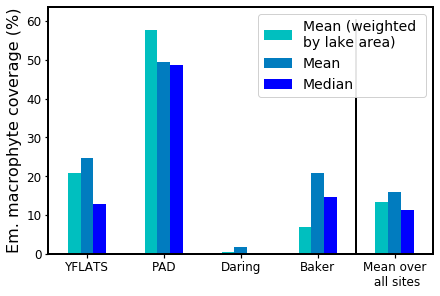

In [245]:
## Plot 4: Mean EM comparison on 4 key dates
%matplotlib inline

# ## colors
# from cycler import cycler
# color_cycle = cycler(c=['r', 'g', 'b'])

fig4, ax4 = plt.subplots(constrained_layout=True) # constrained_layout is now default for presentation
# bar_heights=np.vstack((lakes_mean_df.em_weight_avg, lakes_mean_df.em_fractio))
# ax4.bar(np.arange(4), bar_heights, alpha=0.4, color='g')

lakes_mean_df_append.iloc[[0,1,2,3,7], :][['em_weight_avg', 'em_fractio', 'em_median']].plot.bar(ax=ax4, color = ['c', '#017CBF', 'b'])
# ax4.set_xlabel('Area ($km^2$)')
# ax4.set_ytick_labels([1,2])
# plt.setp(ax4.get_yticklabels(),labels=[1])
plt.gca().set_yticklabels([0,10,20,30,40,50,60]) # Sloopy fix!
ax4.set_xticks(np.arange(5))
labels=[label.split(' ')[0] for label in lakes_labels]
labels.append('Mean over\n all sites')
ax4.set_xticklabels(labels, rotation=0)
ax4.set_ylabel('Em. macrophyte coverage (%)')

## legend
ax4.legend(['Mean (weighted \nby lake area)','Mean','Median'])

## set ylim
ylims=ax4.get_ylim()
# ax4.set_ylim(ylims)

## add separator line
ax4.vlines(3.5, 0, ylims[1], linewidth = [plt.rcParams['axes.linewidth']])

## Save
figname=os.path.join(fig_dir, 'EM-mean-by-region-min250-max34')
fig4.savefig(figname + '.jpg', dpi=300)
fig4.savefig(figname + '.pdf', dpi=300)

# SCRAP

In [28]:
## Add median! [only median of 4 vals...hm]
lakes_mean_df_med = pd.DataFrame(np.median(lakes_mean_df, axis=0)).T
lakes_mean_df_med.columns=lakes_mean_df.columns
lakes_mean_df_med
# lakes_mean_df

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,Count,em_median
0,13645.266497,156961.391675,2039.250772,0.228495,0.000282,0.043361,0.183756,0.0,1.0,0.139299,1034.5,0.137357


In [152]:
## SCRAP

# lakes_mean_df_append = lakes_mean_df.append(pd.DataFrame(lakes_mean_df.sum()))
# lakes_mean_df_append
([label.split(' ')[0] for label in lakes_labels]).append('All')
labels
ax4.get_xticks()
type(plt.rcParams['axes.linewidth'])
# pd.DataFrame(np.average(lakes_mean_df, weights=lakes_mean_df.Count, axis=0), columns=lakes_mean_df.columns).T #.rename('All')
pd.DataFrame(lakes_mean_df_append[0:-1].mean()).T

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,Count
0,14011.95083,170707.944513,2364.077686,0.255063,0.000807,0.090582,0.163675,0.0,1.0,0.215413,926.5


In [147]:
## SCRAP

lakes_mean_df
# lakes_mean_df.Count
lakes_mean_df_append

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,Count
YFLATS Aug 2018,21299.988932,74557.758431,1474.388578,0.266629,0.002637,0.054272,0.209721,0.0,1.0,0.209361,1536.000000
PAD Sept 2019,10954.664962,170682.978758,3619.403251,0.523086,0.000237,0.271563,0.251286,0.0,1.0,0.577378,391.000000
Daring Sept 2017,16321.135689,182193.575047,1688.450060,0.019698,0.000000,0.000250,0.019448,0.0,1.0,0.005612,1415.000000
Baker Aug 2018,7472.013736,255397.465814,2674.068853,0.210840,0.000353,0.036241,0.174245,0.0,1.0,0.069302,364.000000
0,16949.346195,143558.107904,1900.260503,0.193926,0.001153,0.054800,0.137973,0.0,1.0,0.156638,1253.885051


In [28]:
%matplotlib widget
lakes.em_fractio*100
# plt.scatter(lakes.area_px_m2/1e6, lakes.em_fractio*100, alpha=0.4, color='g')

18      26.046512
21      34.732824
27      18.165468
31      10.378117
35      11.734694
          ...    
1319    19.731650
1320    87.767584
1335    31.154239
1346    32.586786
1347    23.969319
Name: em_fractio, Length: 364, dtype: float64

# Scrap

In [111]:
## Fig 2: Hist plot by area (linear x scale) # old version using object.plt.bar, not plt.bar(...)
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins)
    groups=lakes.groupby(area_bins)
    h=groups.mean().em_fractio.plot.bar(ax=axi, width=1, color='c')
#     bar_locs = [groups.mean().em_fractio.index[j].mid for j in range(len(groups))]
#     axi.bar(bar_locs, groups.mean().em_fractio, color='c') # width=1, 
    axi.set_xlabel('Area ($km^2$)')
    axi.set_ylabel('Mean emergent macrophyte fraction')
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticks(axi.get_xticks()[0:nbins+6:nbins//6])
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticklabels([f'{i:.1f}' for i in bins[0:nbins+6:nbins//6]], rotation = 0) # match default histogram formatting
#     axi.set_xscale('linear')
    axi.set_xticks(np.arange(0,nMajorTicks,1)/nMajorTicks*25)
    axi.set_xticklabels(np.arange(0,nMajorTicks,1), rotation = 0) # match default histogram formatting
    
## save fig 2: by area
figname=os.path.join(fig_dir, 'Hists-by-area-subplots')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [124]:
dir(h)
# h.get_xticks()
print(groups.mean().em_fractio)
print(bar_locs)
print(np.diff(bar_locs)) # not evenlyspaced!
lakes_labels[i]
bins
bins[:-1]

area_px_m2
(0.0, 0.208]      0.227983
(0.208, 0.417]    0.152340
(0.417, 0.625]    0.083529
(0.625, 0.833]    0.073672
(0.833, 1.042]    0.057883
(1.042, 1.25]     0.049353
(1.25, 1.458]     0.030674
(1.458, 1.667]    0.089811
(1.667, 1.875]         NaN
(1.875, 2.083]    0.025910
(2.083, 2.292]         NaN
(2.292, 2.5]           NaN
(2.5, 2.708]           NaN
(2.708, 2.917]         NaN
(2.917, 3.125]    0.044272
(3.125, 3.333]         NaN
(3.333, 3.542]         NaN
(3.542, 3.75]          NaN
(3.75, 3.958]          NaN
(3.958, 4.167]    0.027551
(4.167, 4.375]         NaN
(4.375, 4.583]         NaN
(4.583, 4.792]    0.201960
(4.792, 5.0]           NaN
Name: em_fractio, dtype: float64
[0.104, 0.3125, 0.521, 0.729, 0.9375, 1.146, 1.354, 1.5625, 1.771, 1.979, 2.1875, 2.396, 2.604, 2.8125, 3.021, 3.229, 3.4375, 3.646, 3.854, 4.0625, 4.271, 4.479, 4.6875, 4.896]
[0.2085 0.2085 0.208  0.2085 0.2085 0.208  0.2085 0.2085 0.208  0.2085
 0.2085 0.208  0.2085 0.2085 0.208  0.2085 0.2085 0.208  0.2

array([0.        , 0.20833333, 0.41666667, 0.625     , 0.83333333,
       1.04166667, 1.25      , 1.45833333, 1.66666667, 1.875     ,
       2.08333333, 2.29166667, 2.5       , 2.70833333, 2.91666667,
       3.125     , 3.33333333, 3.54166667, 3.75      , 3.95833333,
       4.16666667, 4.375     , 4.58333333, 4.79166667])